# EDA Project On Cars Data - Prathamesh Jadhav

In [1]:
#ignore non-harmful warnings
from warnings import filterwarnings
filterwarnings("ignore")

## Data ingestion

In [2]:
path = r"C:\Users\Dell\Pictures\DS Document\Basic python\Cars93.duplicate.csv"

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(path, na_values = ["", "NA"], keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Perform basic data quality checks

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=False)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               93 non-null     int64  
 1   id                  93 non-null     int64  
 2   Manufacturer        93 non-null     object 
 3   Model               93 non-null     object 
 4   Type                93 non-null     object 
 5   Min.Price           93 non-null     float64
 6   Price               93 non-null     float64
 7   Max.Price           93 non-null     float64
 8   MPG.city            93 non-null     int64  
 9   MPG.highway         93 non-null     int64  
 10  AirBags             89 non-null     object 
 11  DriveTrain          93 non-null     object 
 12  Cylinders           93 non-null     object 
 13  EngineSize          93 non-null     float64
 14  Horsepower          93 non-null     int64  
 15  RPM                 93 non-null     int64  
 16  Rev.per.mi

In [9]:
m = df.isna().sum()
m

index                  0
id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [10]:
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

## Missing Value Treatment

In [11]:
def replacer(df: pd.DataFrame):
    cat = list(df.columns[df.dtypes == "object"])
    for col in df.columns:
        if col in cat:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        else:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)
    print("missing values replaced")

In [12]:
replacer(df)

missing values replaced


In [13]:
df.isna().sum()

index                 0
id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

## Perform Descriptive statistics

In [14]:
cat = list(df.columns[df.dtypes == "object"])
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [15]:
con = list(df.columns[df.dtypes != "object"])
con

['index',
 'id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [16]:
df[con].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
index,93.0,46.00,26.99,0.0,23.0,46.0,69.0,92.0
id,93.0,47.00,26.99,1.0,24.0,47.0,70.0,93.0
Min.Price,93.0,17.13,8.75,6.7,10.8,14.7,20.3,45.4
Price,93.0,19.51,9.66,7.4,12.2,17.7,23.3,61.9
Max.Price,93.0,21.90,11.03,7.9,14.7,19.6,25.3,80.0
MPG.city,93.0,22.37,5.62,15.0,18.0,21.0,25.0,46.0
MPG.highway,93.0,29.09,5.33,20.0,26.0,28.0,31.0,50.0
EngineSize,93.0,2.67,1.04,1.0,1.8,2.4,3.3,5.7
Horsepower,93.0,143.83,52.37,55.0,103.0,140.0,170.0,300.0
RPM,93.0,5280.65,596.73,3800.0,4800.0,5200.0,5750.0,6500.0


In [17]:
df[cat].describe().T

,count,unique,top,freq
Manufacturer,93,32,Chevrolet,8
Model,93,93,Integra,1
Type,93,6,Midsize,22
AirBags,93,3,Driver only,46
DriveTrain,93,3,Front,67
Cylinders,93,6,4,49
Man.trans.avail,93,2,Yes,61
Origin,93,2,USA,48
Make,93,93,Acura Integra,1


In [18]:
df["Manufacturer"].value_counts()

Manufacturer
Chevrolet        8
Ford             8
Dodge            6
Mazda            5
Pontiac          5
Oldsmobile       4
Hyundai          4
Buick            4
Nissan           4
Toyota           4
Volkswagen       4
Subaru           3
Honda            3
Geo              2
Audi             2
Acura            2
Volvo            2
Mitsubishi       2
Mercedes-Benz    2
Lexus            2
Chrysler         2
Cadillac         2
Eagle            2
Lincoln          2
Mercury          2
Infiniti         1
BMW              1
Chrylser         1
Plymouth         1
Saab             1
Saturn           1
Suzuki           1
Name: count, dtype: int64

In [19]:
df["Cylinders"].value_counts()

Cylinders
4         49
6         31
8          7
3          3
5          2
rotary     1
Name: count, dtype: int64

<Axes: xlabel='Cylinders'>

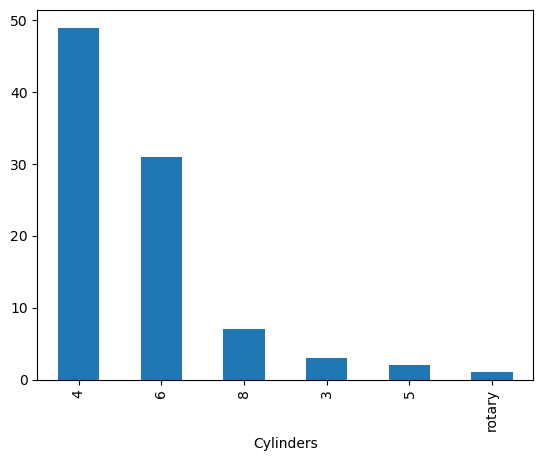

In [20]:
df["Cylinders"].value_counts().plot(kind="bar")

# Data Visualization
1. Univariate  
2. Bivariate
3. Multivariate

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Univariate analysis

### Countplot

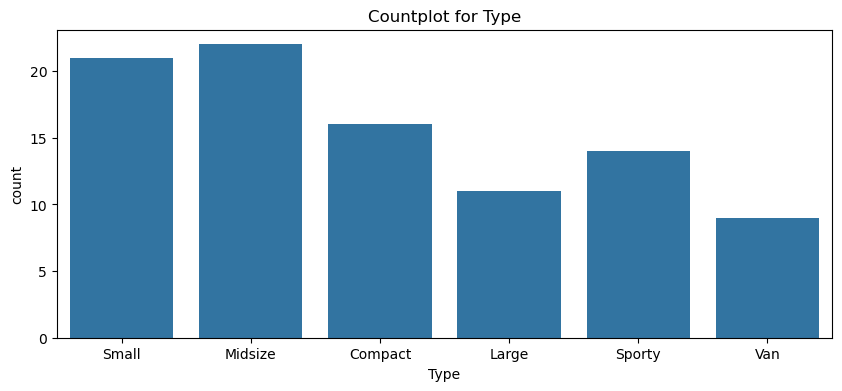

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="Type")
plt.title("Countplot for Type")
plt.show()

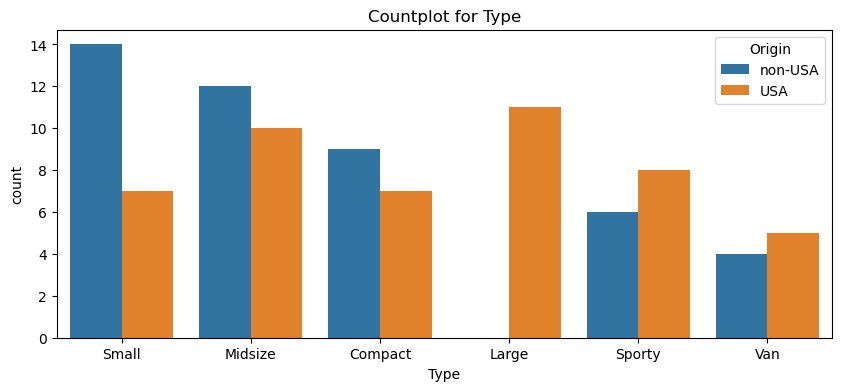

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="Type", hue="Origin")
plt.title("Countplot for Type")
plt.show()

In [24]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

Manufacturer
Chevrolet        8
Ford             8
Dodge            6
Mazda            5
Pontiac          5
Oldsmobile       4
Hyundai          4
Buick            4
Nissan           4
Toyota           4
Volkswagen       4
Subaru           3
Honda            3
Geo              2
Audi             2
Acura            2
Volvo            2
Mitsubishi       2
Mercedes-Benz    2
Lexus            2
Chrysler         2
Cadillac         2
Eagle            2
Lincoln          2
Mercury          2
Infiniti         1
BMW              1
Chrylser         1
Plymouth         1
Saab             1
Saturn           1
Suzuki           1
Name: count, dtype: int64


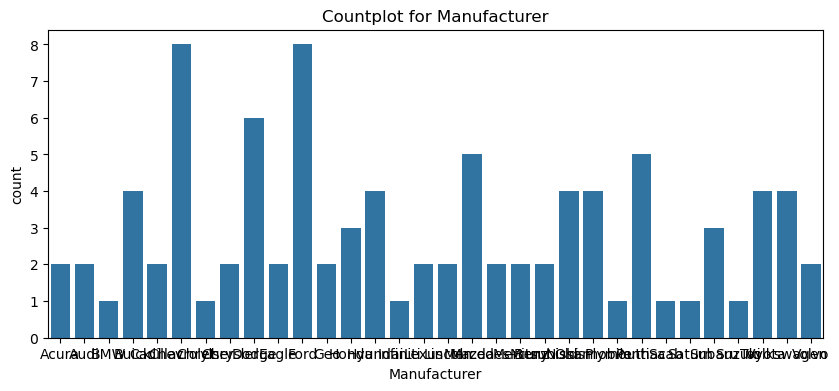

Model
Integra    1
Legend     1
90         1
100        1
535i       1
          ..
Eurovan    1
Passat     1
Corrado    1
240        1
850        1
Name: count, Length: 93, dtype: int64


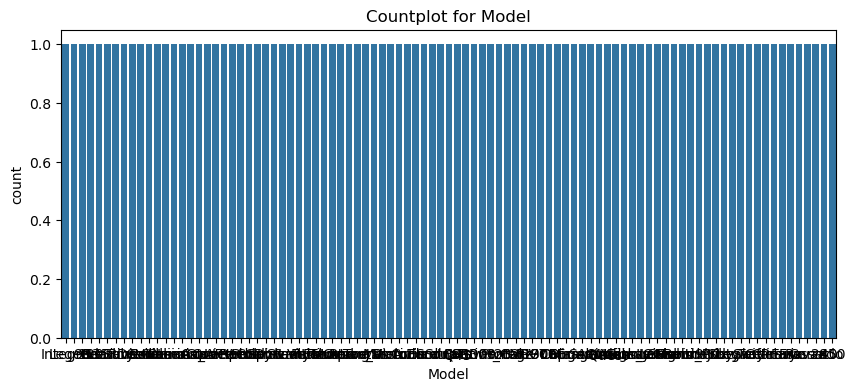

Type
Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: count, dtype: int64


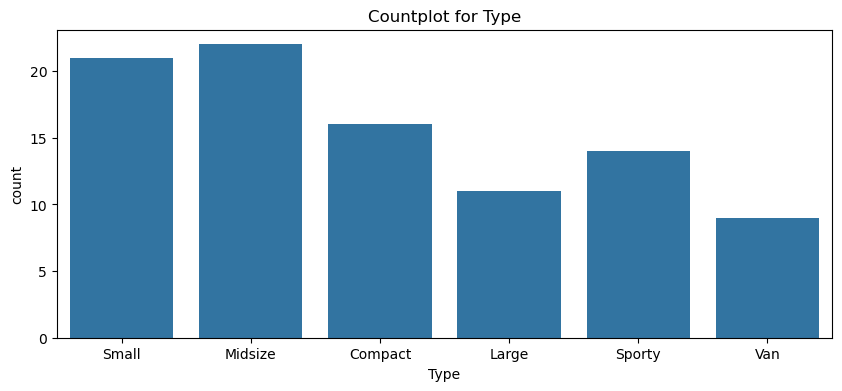

AirBags
Driver only           46
None                  33
Driver & Passenger    14
Name: count, dtype: int64


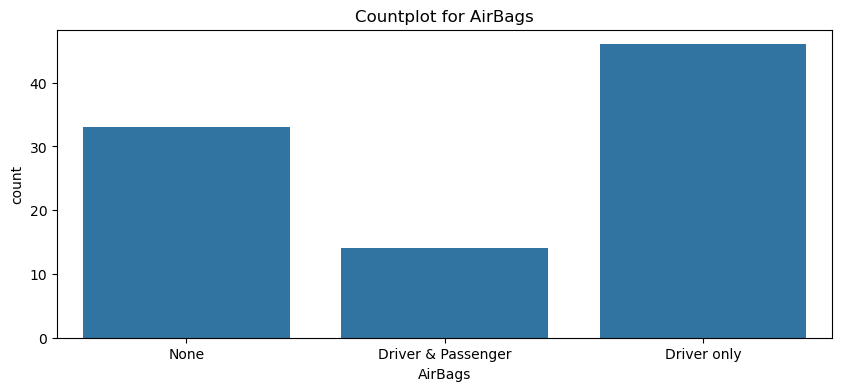

DriveTrain
Front    67
Rear     16
4WD      10
Name: count, dtype: int64


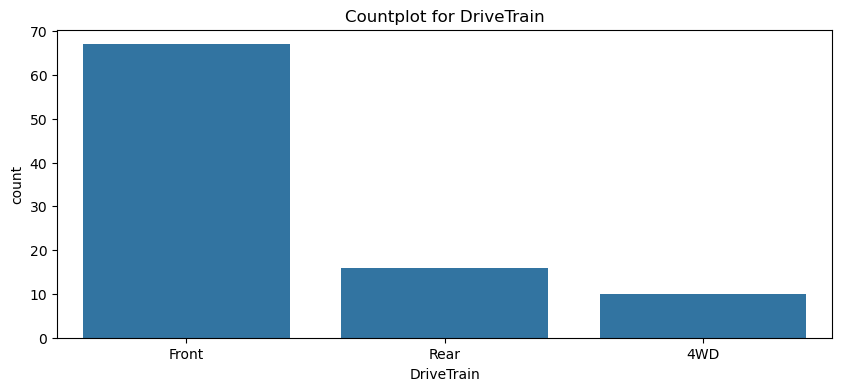

Cylinders
4         49
6         31
8          7
3          3
5          2
rotary     1
Name: count, dtype: int64


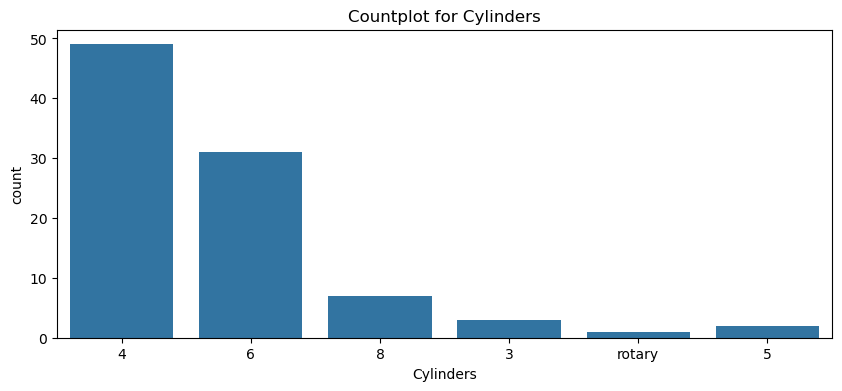

Man.trans.avail
Yes    61
No     32
Name: count, dtype: int64


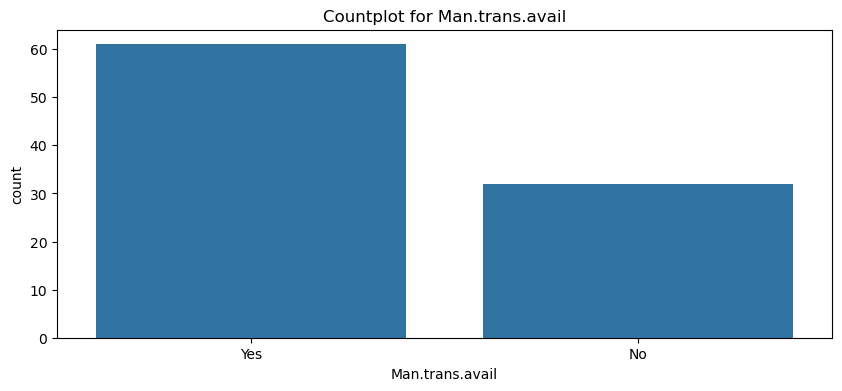

Origin
USA        48
non-USA    45
Name: count, dtype: int64


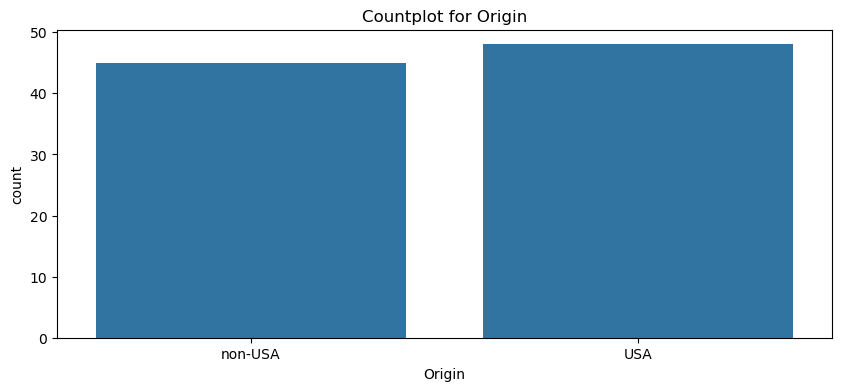

Make
Acura Integra         1
Acura Legend          1
Audi 90               1
Audi 100              1
BMW 535i              1
                     ..
Volkswagen Eurovan    1
Volkswagen Passat     1
Volkswagen Corrado    1
Volvo 240             1
Volvo 850             1
Name: count, Length: 93, dtype: int64


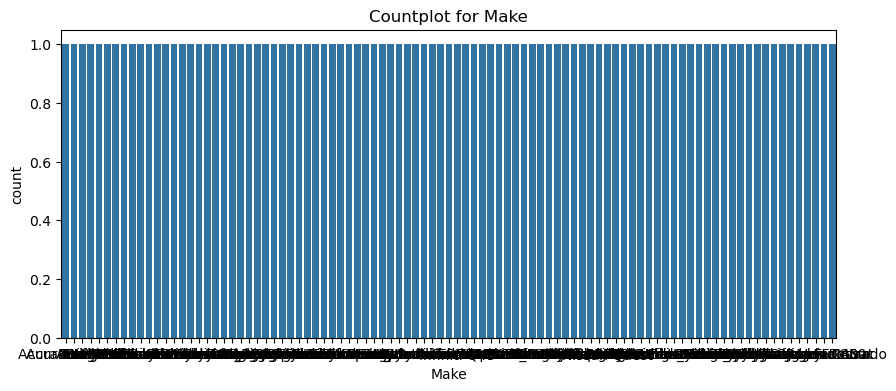

In [25]:
for col in cat:
    print(df[col].value_counts())
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot for {col}")
    plt.show()

### histplot

In [26]:
con

['index',
 'id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

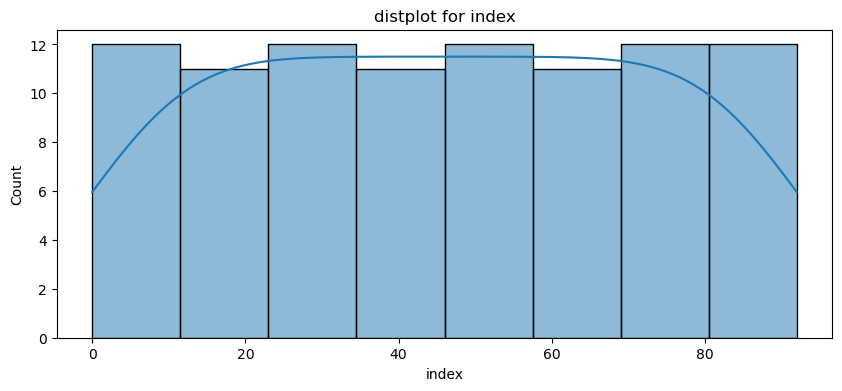

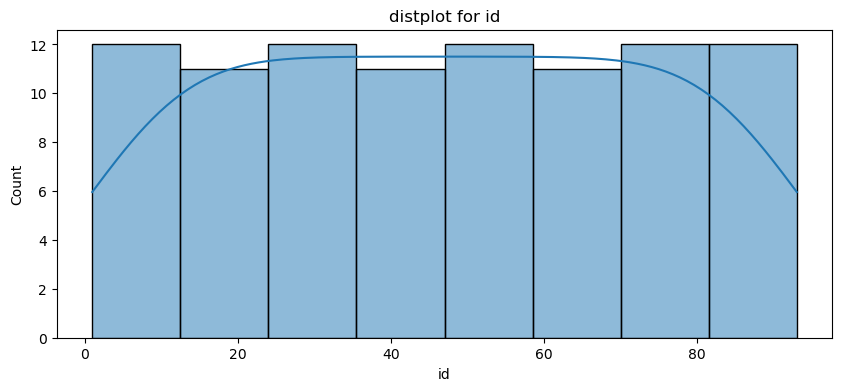

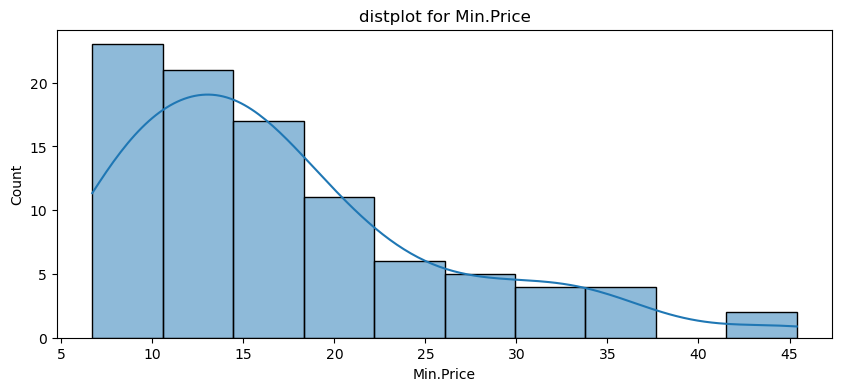

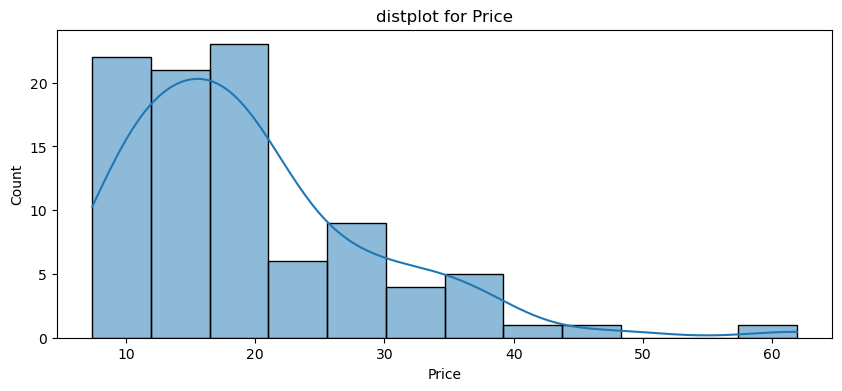

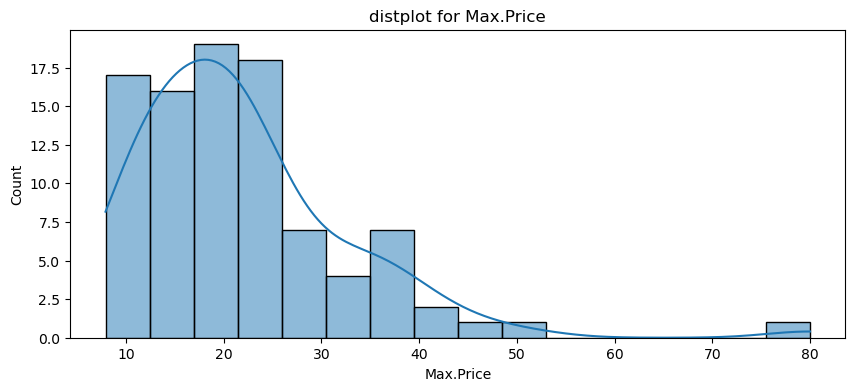

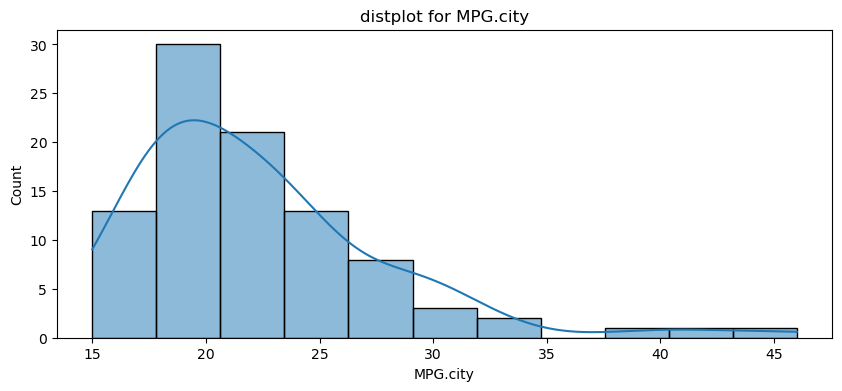

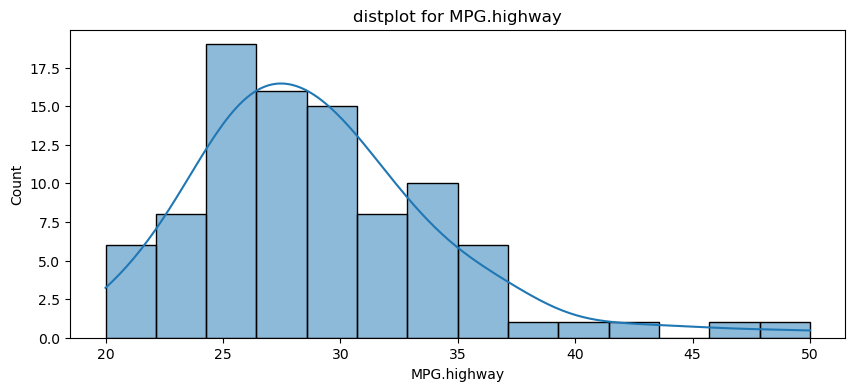

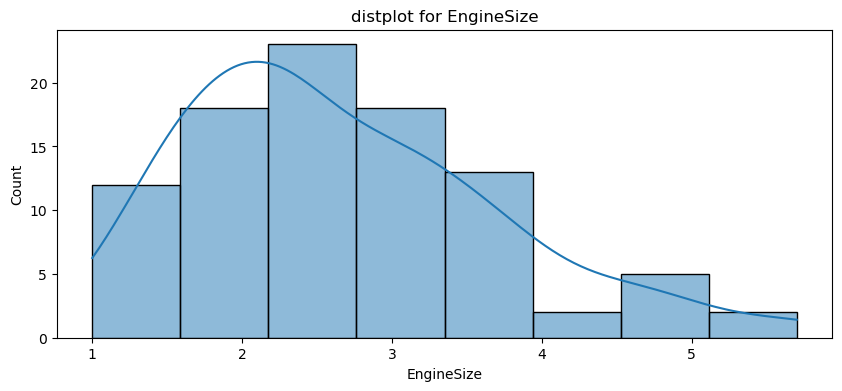

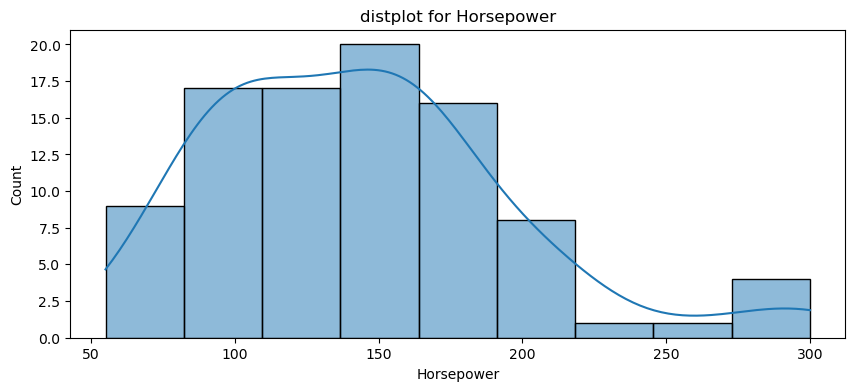

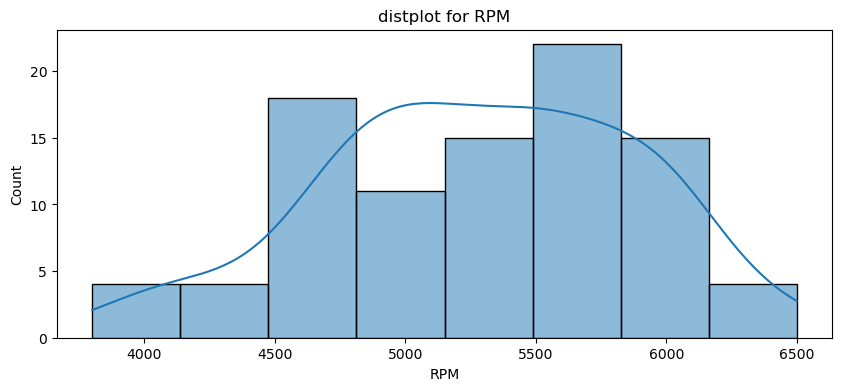

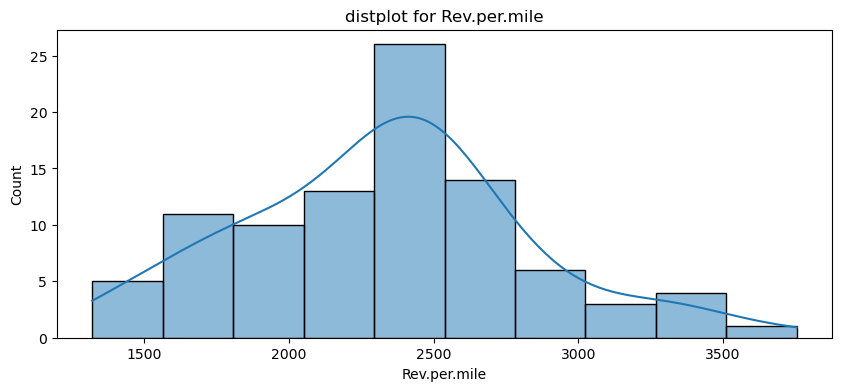

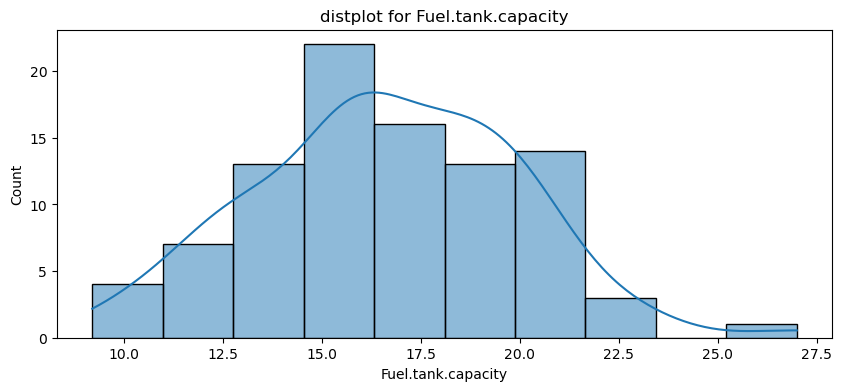

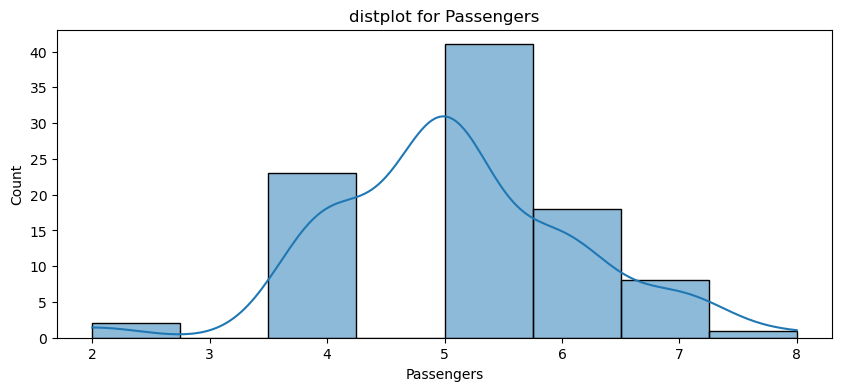

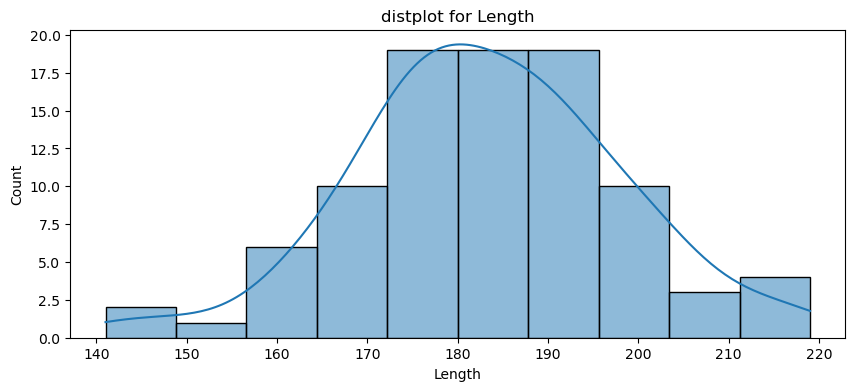

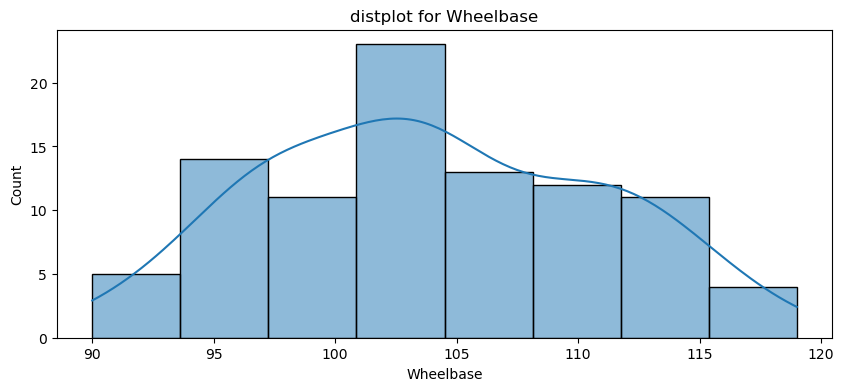

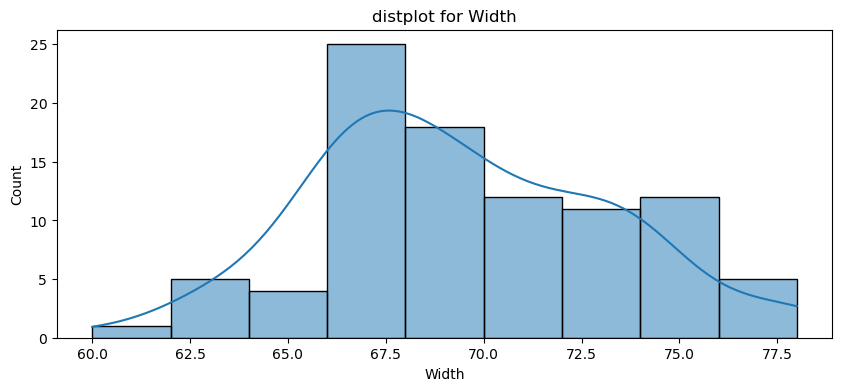

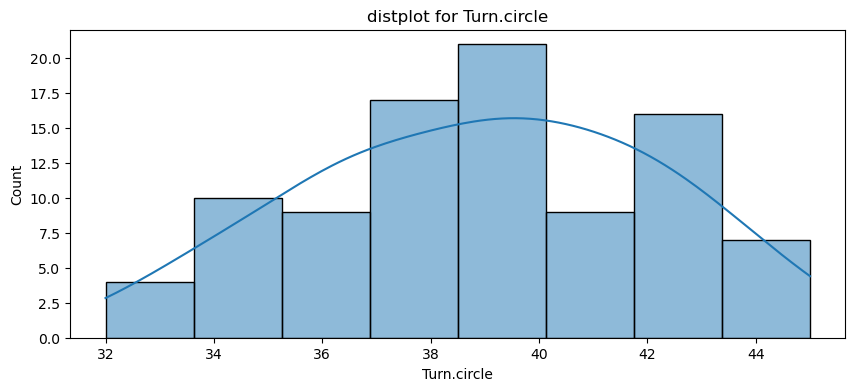

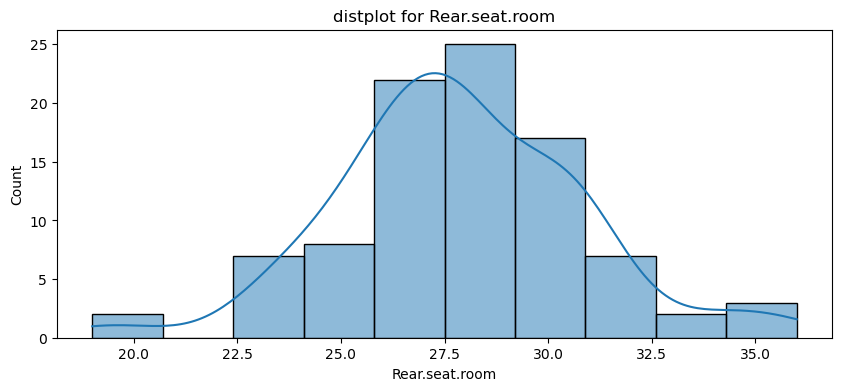

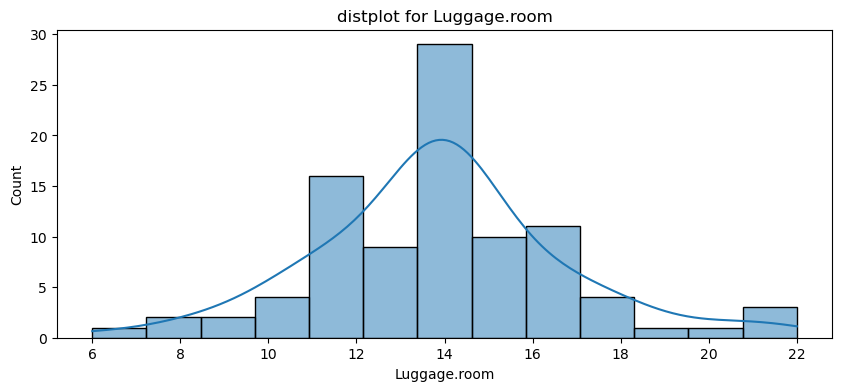

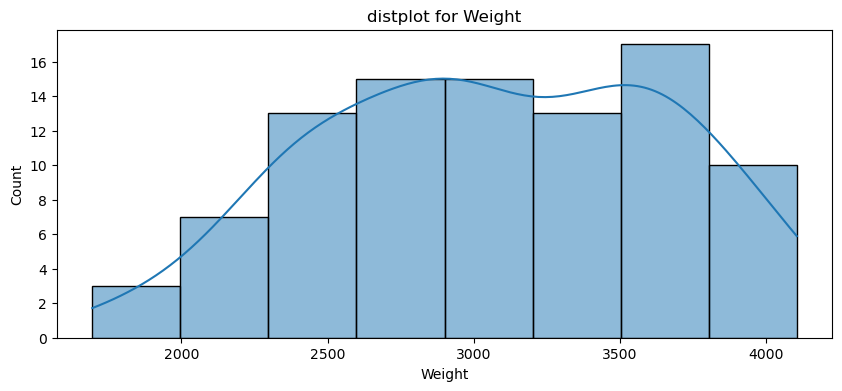

In [27]:
for col in con:
    plt.figure(figsize = (10,4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"distplot for {col}")
    plt.show()

## 2. Bivariate Analysis

### con vs con -> scatterplot, regplot

In [28]:
con

['index',
 'id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

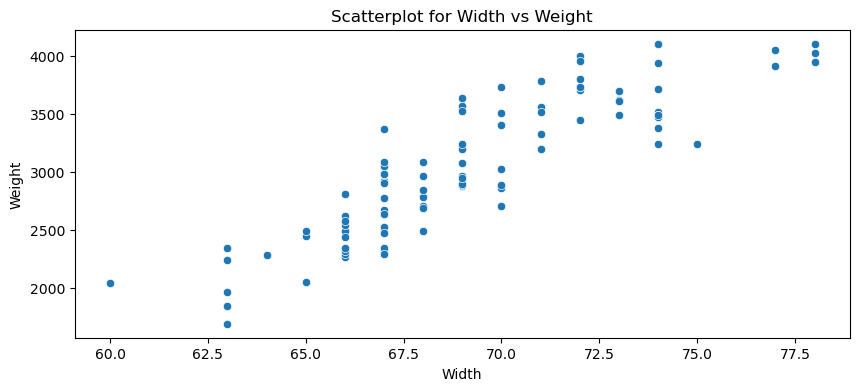

In [29]:
plt.figure(figsize= (10,4))
sns.scatterplot(data=df, x="Width", y= "Weight")
plt.title("Scatterplot for Width vs Weight")
plt.show()

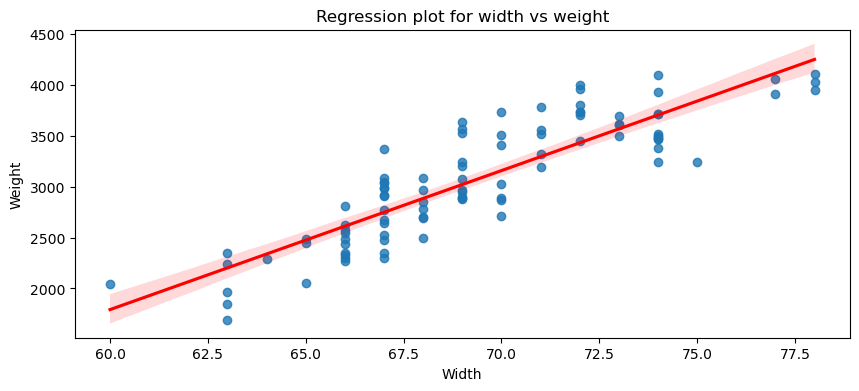

In [30]:
plt.figure(figsize=(10,4))
sns.regplot(data=df, x="Width", y="Weight", line_kws = {"color" : "Red"})
plt.title("Regression plot for width vs weight")
plt.show()

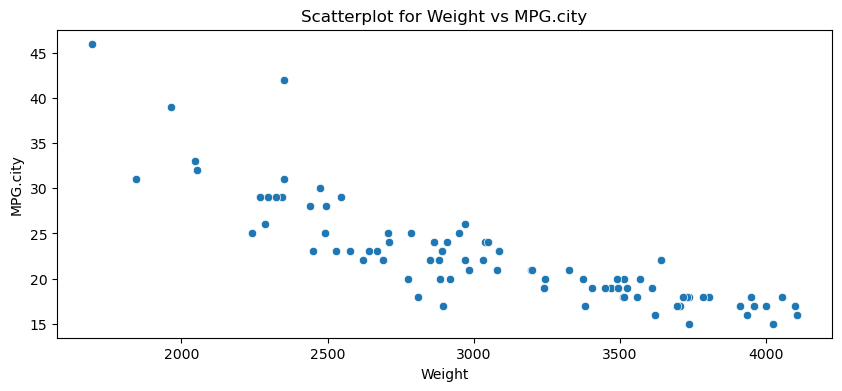

In [31]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x= "Weight", y="MPG.city")
plt.title("Scatterplot for Weight vs MPG.city")
plt.show()

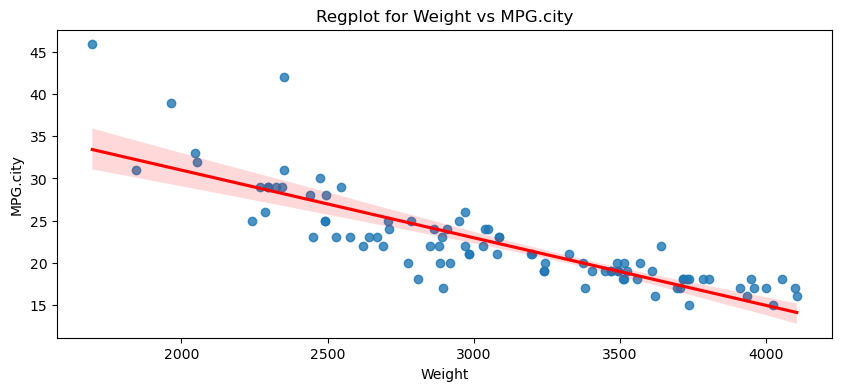

In [32]:
plt.figure(figsize=(10,4))
sns.regplot(data=df, x="Weight", y="MPG.city", line_kws = {"color" : "Red"})
plt.title("Regplot for Weight vs MPG.city")
plt.show()

In [33]:
def plot_scatter(df:pd.DataFrame, x:str, y:str):
    plt.figure(figsize = (10,3))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f"Scatterplot for {x} and {y}")
    plt.show()

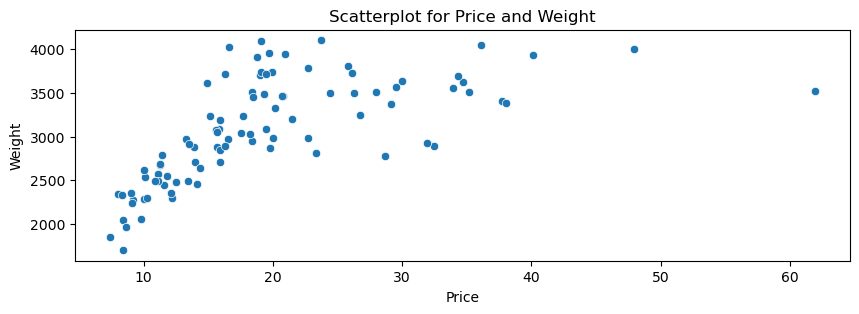

In [34]:
plot_scatter(df, x="Price", y="Weight")

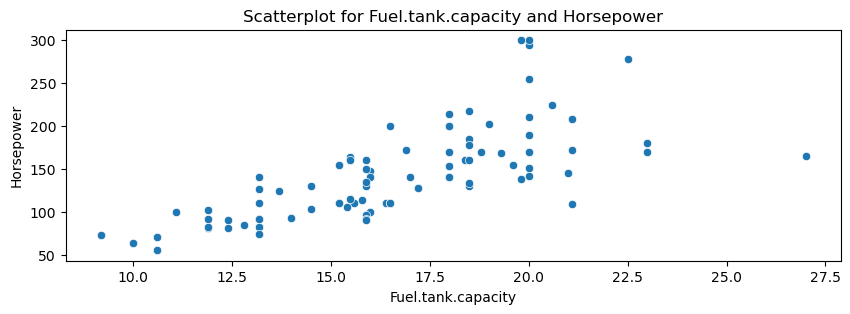

In [35]:
plot_scatter(df, x="Fuel.tank.capacity", y="Horsepower")

### Cat vs Con -> Boxplot

In [36]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [37]:
con

['index',
 'id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

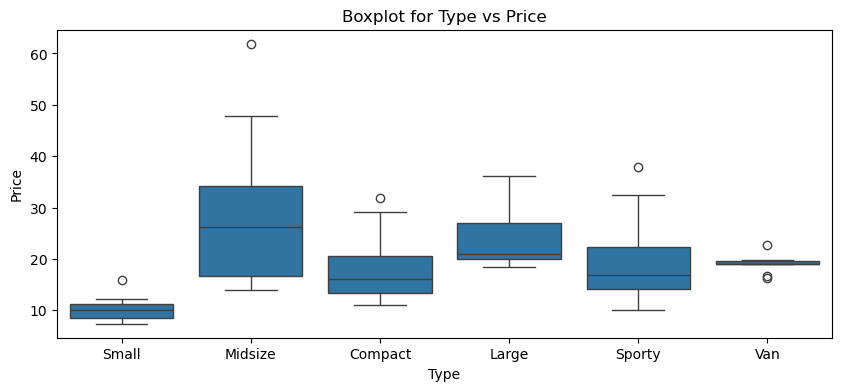

In [38]:
plt.figure(figsize = (10,4))
sns.boxplot(data=df, x= "Type", y="Price")
plt.title("Boxplot for Type vs Price")
plt.show()

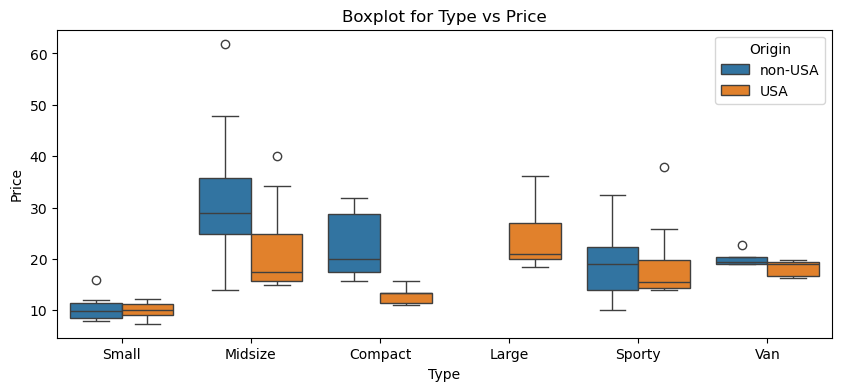

In [39]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x="Type", y= "Price", hue = "Origin")
plt.title("Boxplot for Type vs Price")
plt.show()

In [40]:
u = df[cat].nunique()
u

Manufacturer       32
Model              93
Type                6
AirBags             3
DriveTrain          3
Cylinders           6
Man.trans.avail     2
Origin              2
Make               93
dtype: int64

In [41]:
len(df)

93

In [47]:
ids = u[u == len(df)].index.tolist()
ids

['Model', 'Make']

In [50]:
for col in cat:
    if col in ids:
        cat.remove(col)
    

In [51]:
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

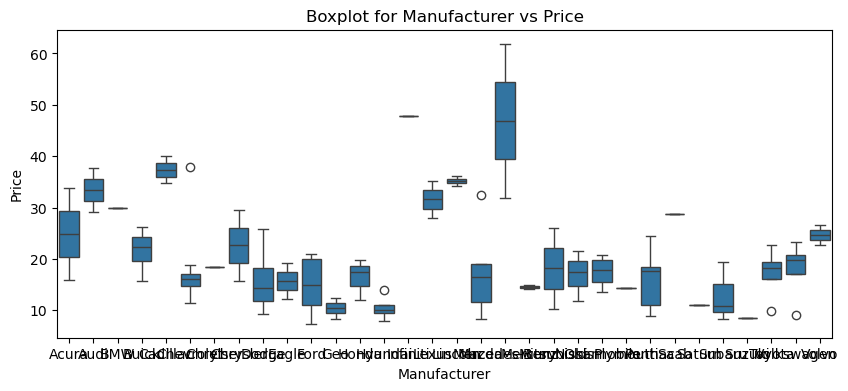

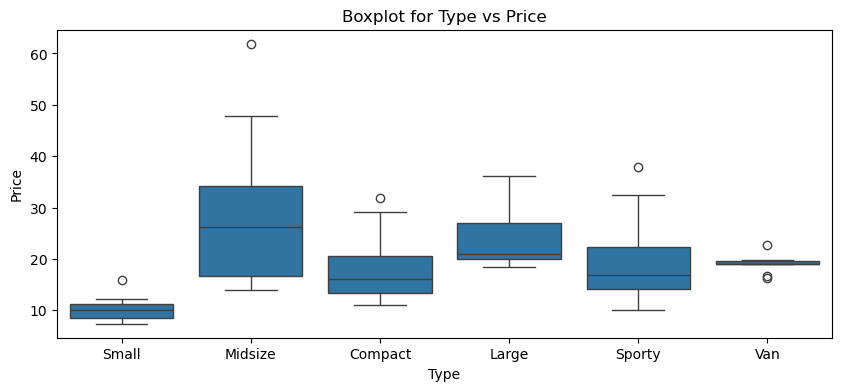

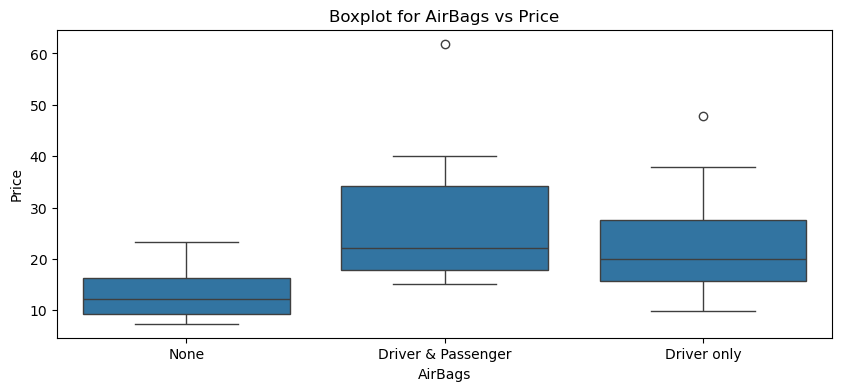

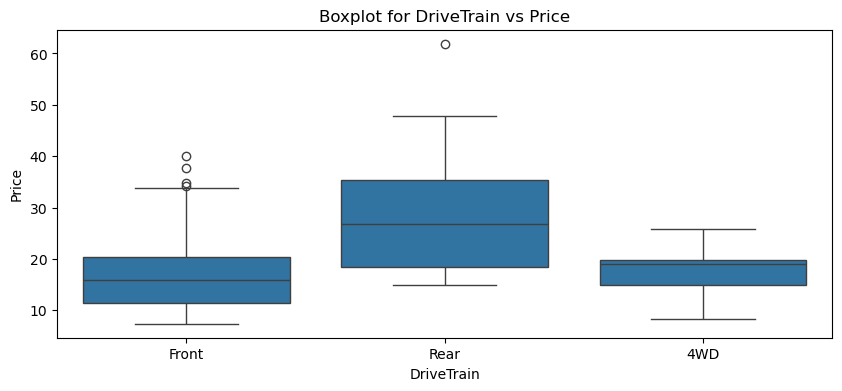

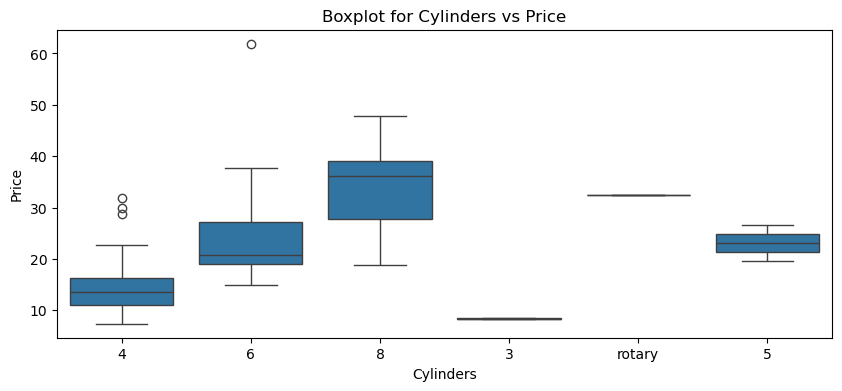

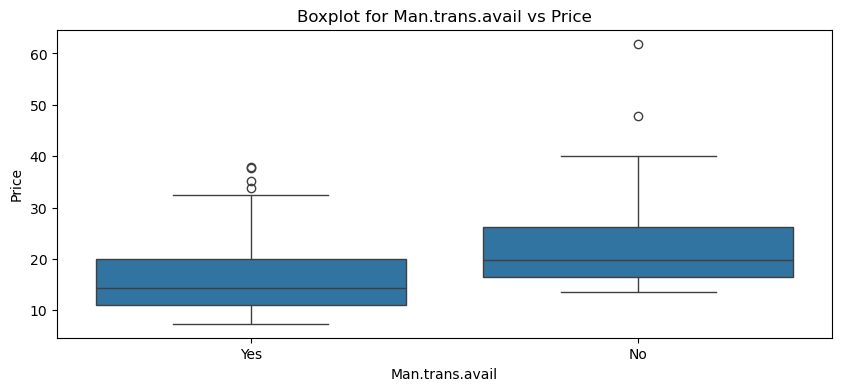

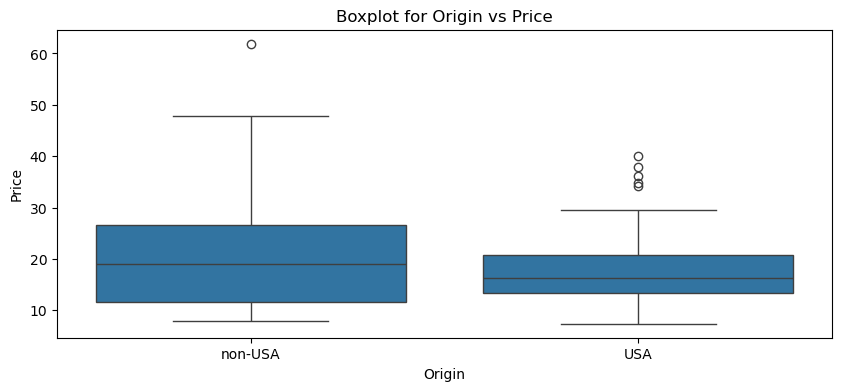

In [53]:
for col in cat:
    plt.figure(figsize = (10,4))
    sns.boxplot(data = df, x = col, y="Price")
    plt.title(f"Boxplot for {col} vs Price")
    plt.show()

### cat vs cat -> Crosstab heatmap

In [54]:
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

In [55]:
ctab1 = pd.crosstab(df["Type"], df["Origin"])
ctab1

Origin,USA,non-USA
Type,,
Compact,7,9
Large,11,0
Midsize,10,12
Small,7,14
Sporty,8,6
Van,5,4


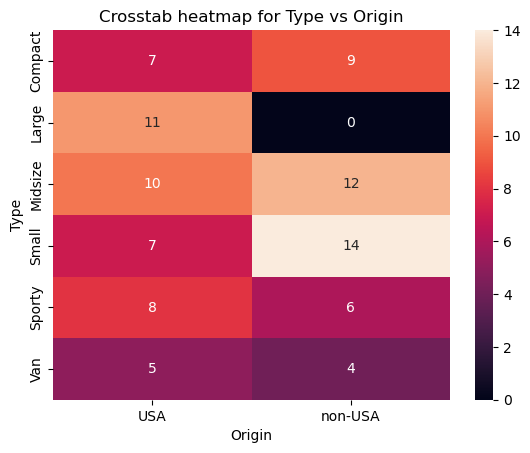

In [56]:
sns.heatmap(data=ctab1, annot=True, fmt="d")
plt.title("Crosstab heatmap for Type vs Origin")
plt.show()

In [60]:
def crosstab_heatmap(df: pd.DataFrame, cat_col1:str, cat_col2:str):
    ctab = pd.crosstab(df[cat_col1], df[cat_col2])
    print(ctab)
    sns.heatmap(ctab, annot=True, fmt="d")
    plt.title(f"Crosstab Heatmap for {cat_col1} vs {cat_col2}")
    plt.show()

Cylinders   3   4  5   6  8  rotary
DriveTrain                         
4WD         1   4  0   5  0       0
Front       2  41  2  20  2       0
Rear        0   4  0   6  5       1


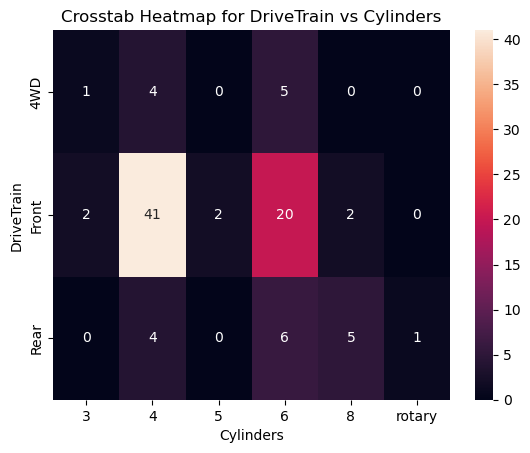

In [61]:
crosstab_heatmap(df, "DriveTrain", "Cylinders")

Origin              USA  non-USA
AirBags                         
Driver & Passenger    8        6
Driver only          24       22
None                 16       17


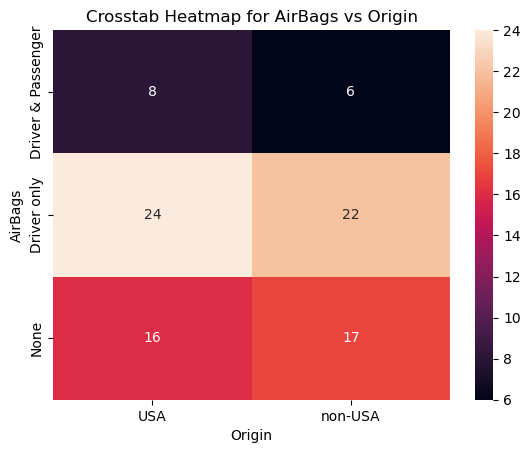

In [62]:
crosstab_heatmap(df, "AirBags", "Origin")

## 3. Multivariate Analysis

### Correlation plot

In [63]:
corr = df.corr(numeric_only=True)
corr

,index,id,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
index,1.000000,1.000000,-0.144463,-0.137277,-0.126567,0.161808,0.137317,-0.338286,-0.233012,0.167772,0.226389,-0.179034,-0.142252,-0.277911,-0.244888,-0.293592,-0.275867,-0.126129,-0.161114,-0.220525
id,1.000000,1.000000,-0.144463,-0.137277,-0.126567,0.161808,0.137317,-0.338286,-0.233012,0.167772,0.226389,-0.179034,-0.142252,-0.277911,-0.244888,-0.293592,-0.275867,-0.126129,-0.161114,-0.220525
Min.Price,-0.144463,-0.144463,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.361525,0.395783,0.666554
Price,-0.137277,-0.137277,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.301888,0.354635,0.647179
Max.Price,-0.126567,-0.126567,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.241600,0.307020,0.605142
MPG.city,0.161808,0.161808,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.380435,-0.462204,-0.843139
MPG.highway,0.137317,0.137317,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.364284,-0.327732,-0.810658
EngineSize,-0.338286,-0.338286,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.473740,0.618326,0.845075
Horsepower,-0.233012,-0.233012,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.236871,0.328568,0.738798
RPM,0.167772,0.167772,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.333847,-0.481744,-0.427931


In [64]:
corr.loc["Weight", "Width"]

np.float64(0.874960542037587)

In [65]:
corr.loc["Weight", "MPG.city"]

np.float64(-0.8431385479968195)

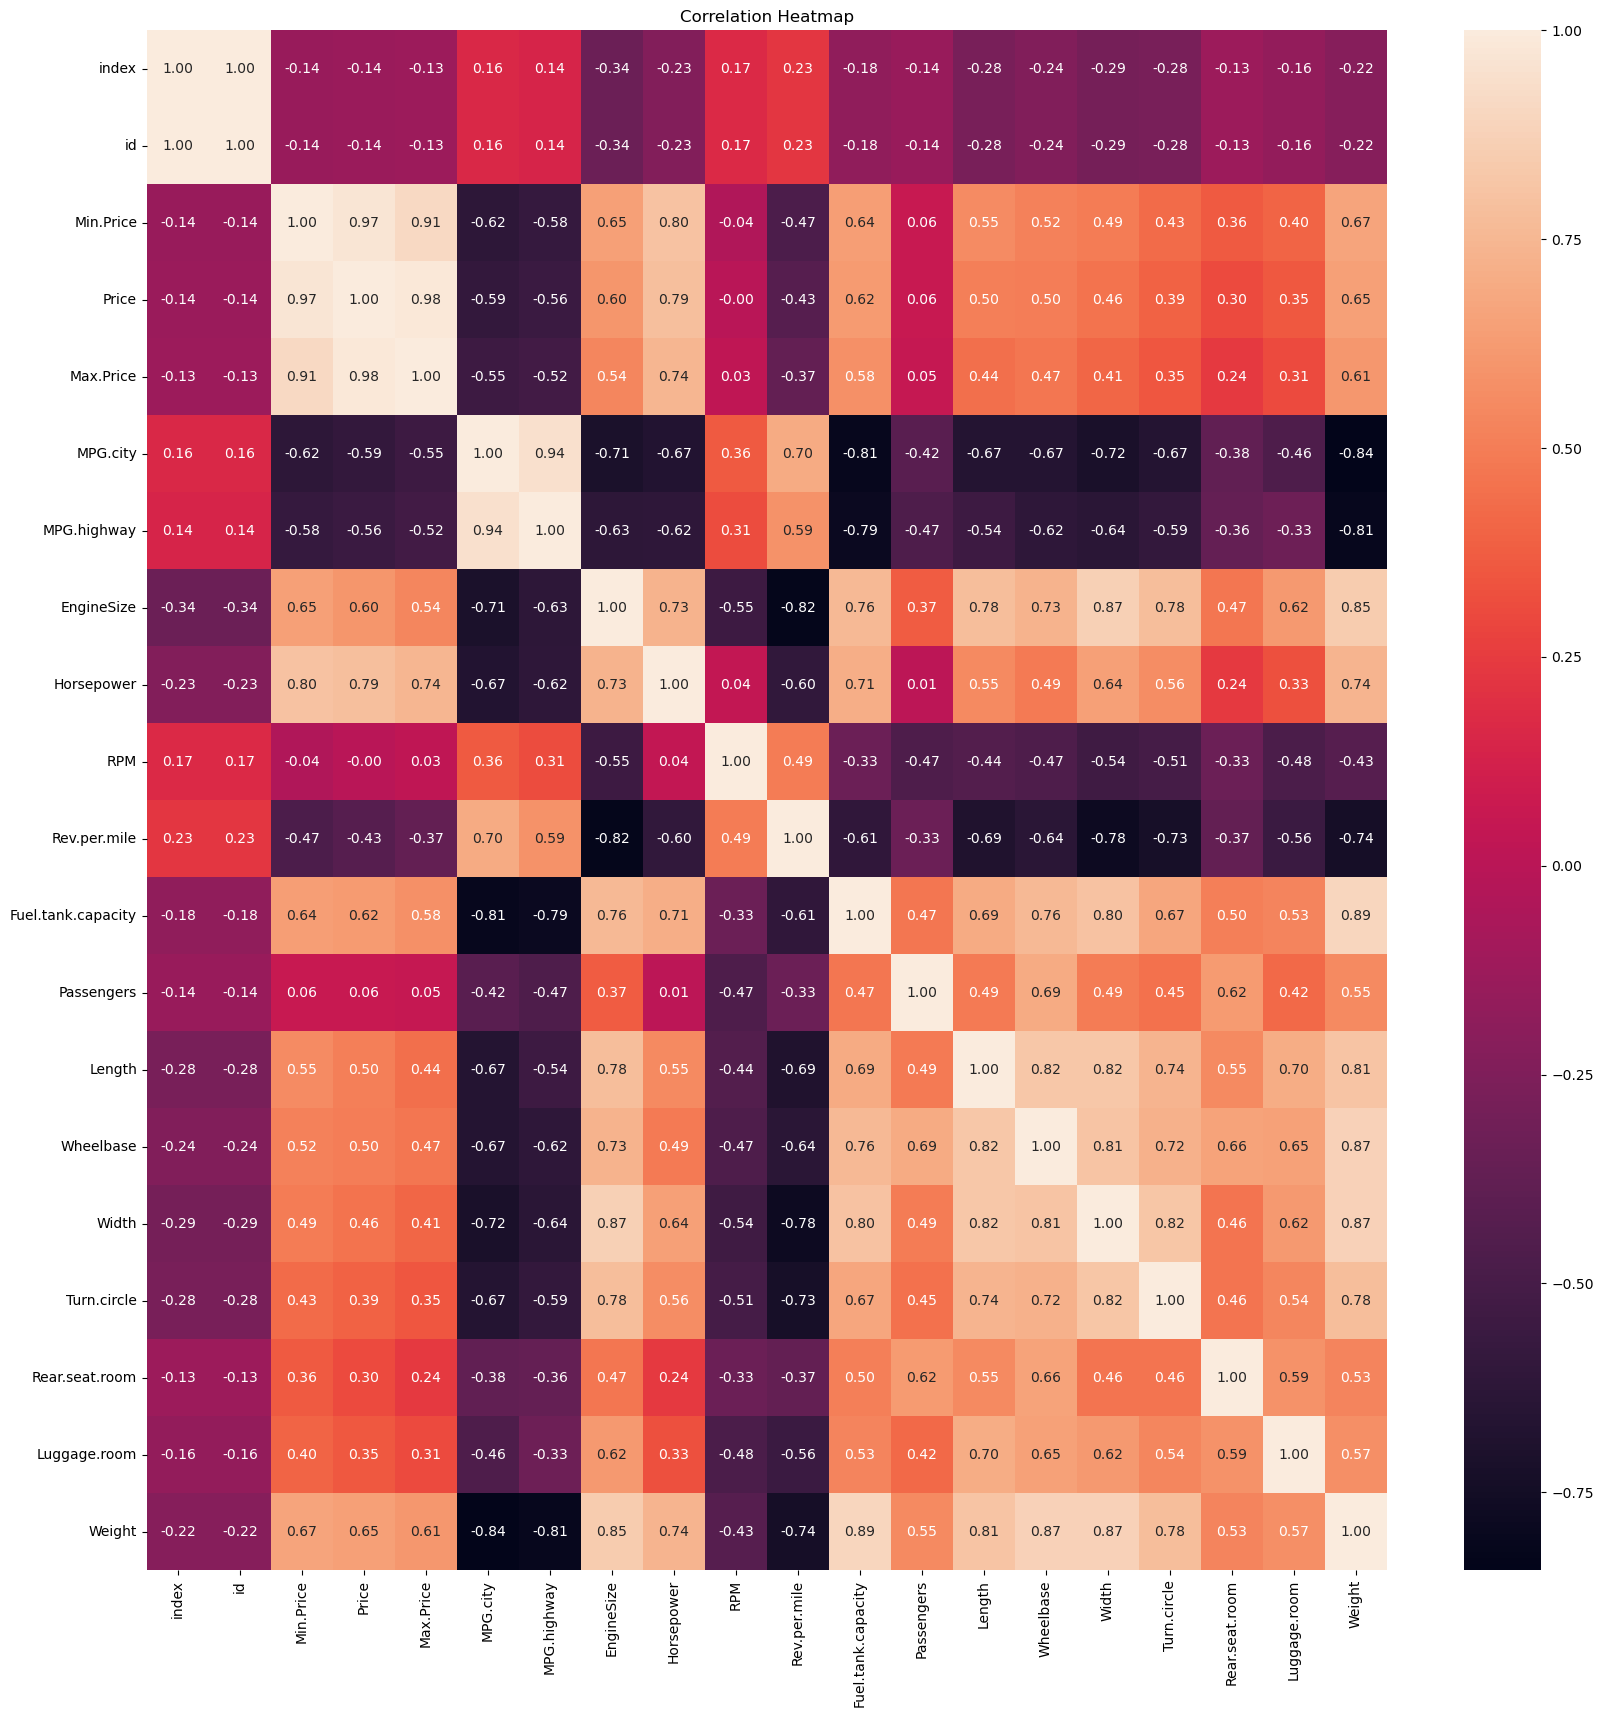

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Pairplot

In [69]:
cols = ["Weight", "Price", "Width", "MPG.city", "MPG.highway", "EngineSize"]
df[cols]

,Weight,Price,Width,MPG.city,MPG.highway,EngineSize
0,2705,15.9,68,25,31,1.8
1,3560,33.9,71,18,25,3.2
2,3375,29.1,67,20,26,2.8
3,3405,37.7,70,19,26,2.8
4,3640,30.0,69,22,30,3.5
...,...,...,...,...,...,...
88,3960,19.7,72,17,21,2.5
89,2985,20.0,67,21,30,2.0
90,2810,23.3,66,18,25,2.8
91,2985,22.7,67,21,28,2.3


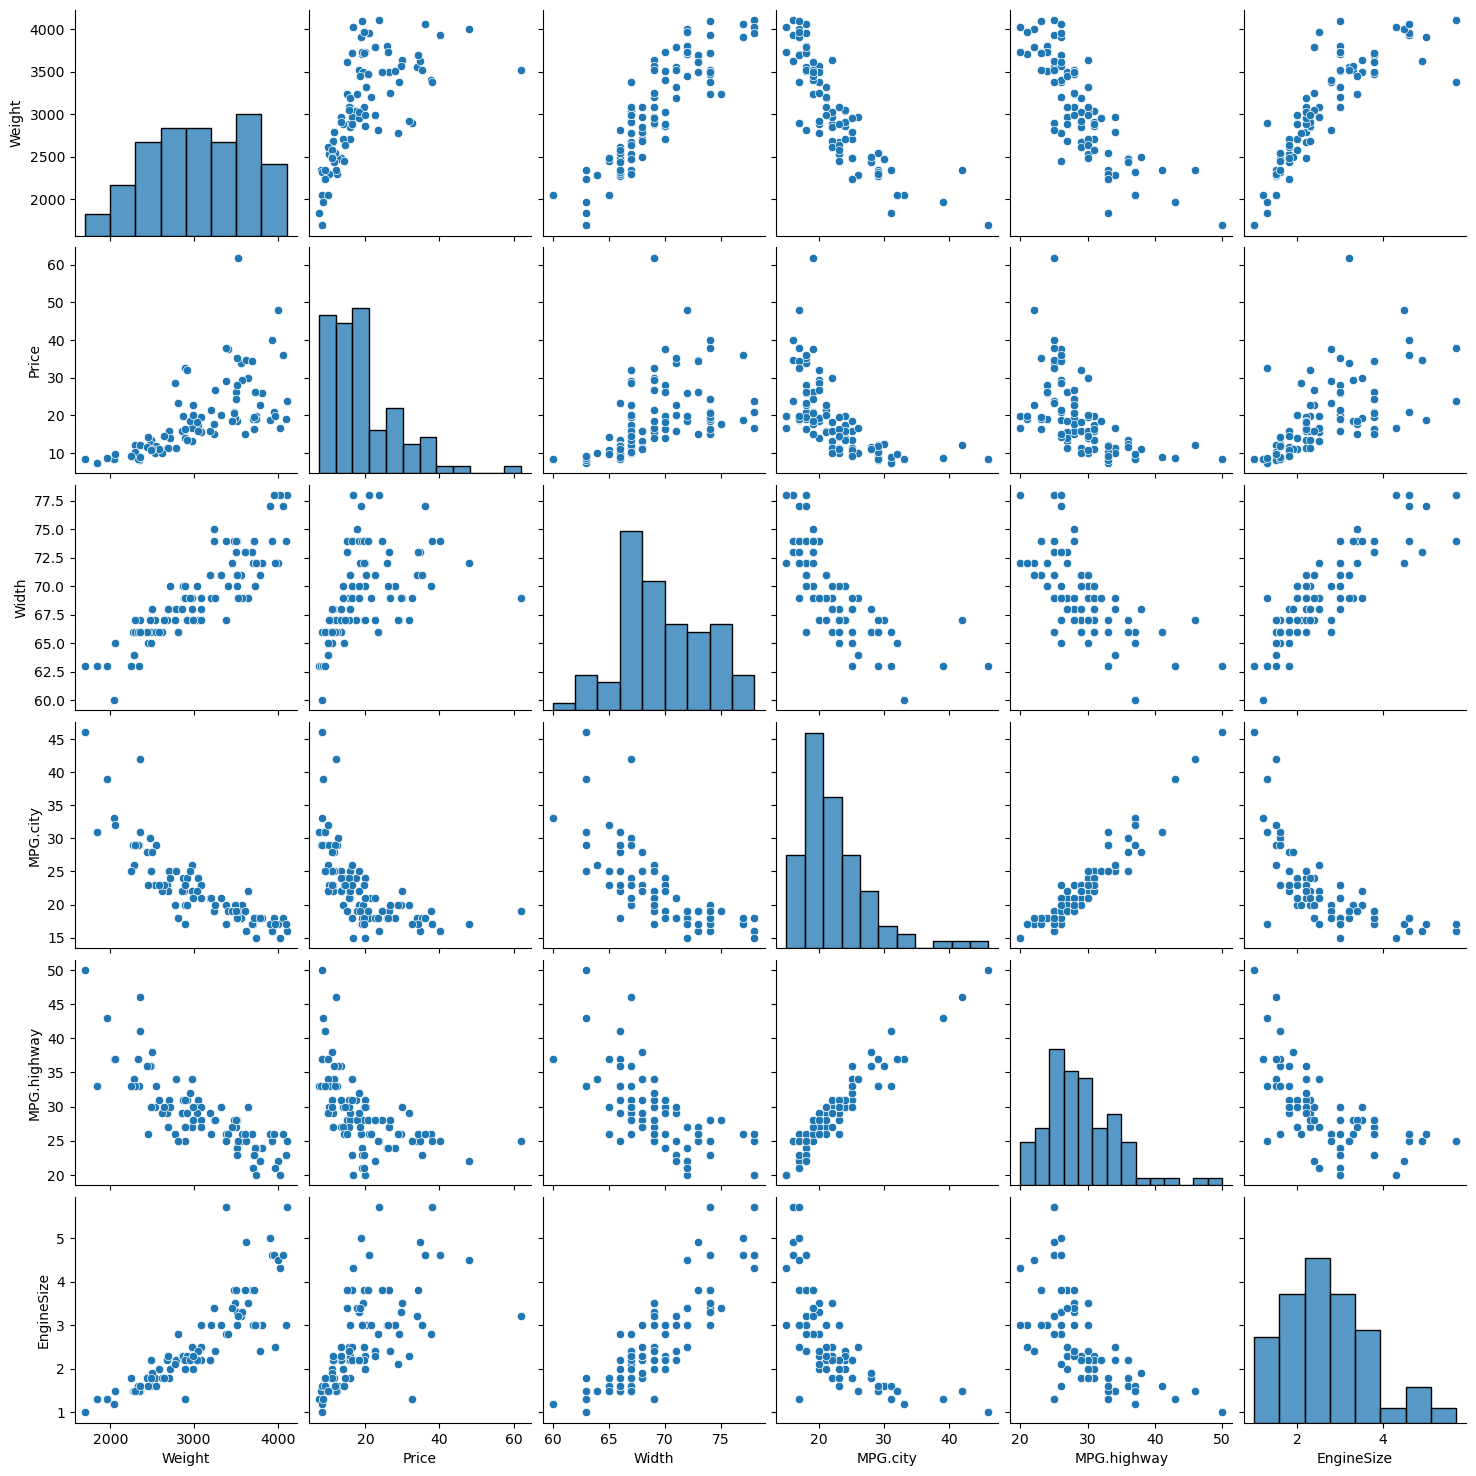

In [70]:
sns.pairplot(df[cols])

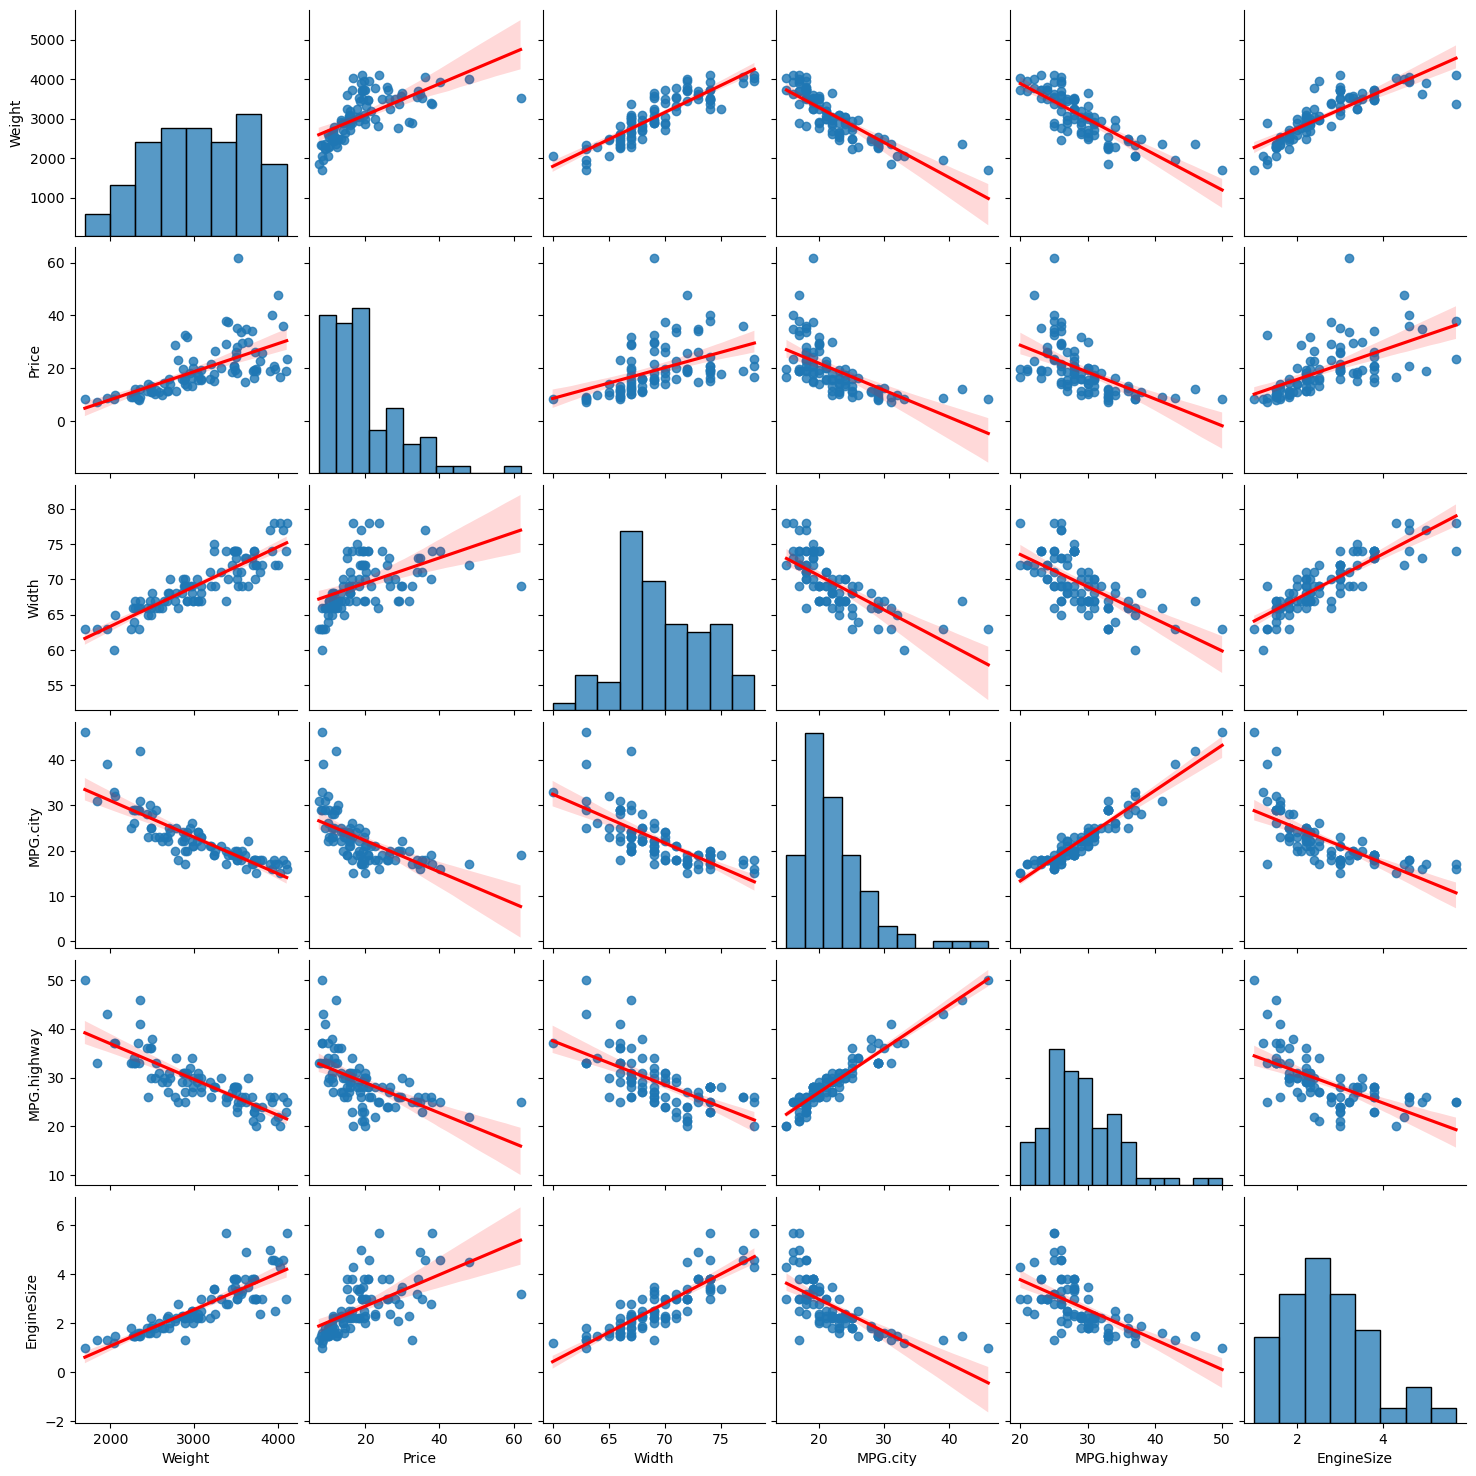

In [72]:
sns.pairplot(df[cols], kind="reg", plot_kws = {"line_kws" : {"color" : "red"}})

In [73]:
corr2 = df[cols].corr()
corr2

,Weight,Price,Width,MPG.city,MPG.highway,EngineSize
Weight,1.000000,0.647179,0.874961,-0.843139,-0.810658,0.845075
Price,0.647179,1.000000,0.456028,-0.594562,-0.560680,0.597425
Width,0.874961,0.456028,1.000000,-0.720534,-0.640359,0.867110
MPG.city,-0.843139,-0.594562,-0.720534,1.000000,0.943936,-0.710003
MPG.highway,-0.810658,-0.560680,-0.640359,0.943936,1.000000,-0.626795
EngineSize,0.845075,0.597425,0.867110,-0.710003,-0.626795,1.000000


<Axes: >

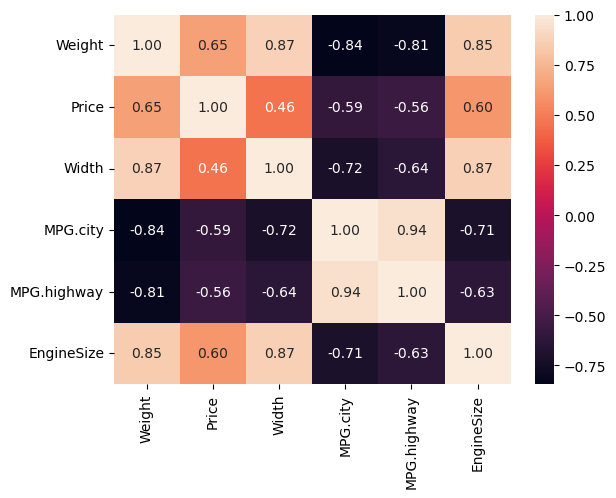

In [74]:
sns.heatmap(corr2, annot=True, fmt=".2f")

### Q.1 Show Average price of car by type

In [75]:
a = (
    df.groupby(by = "Type")
    .agg({"Price" : "mean"})
    .sort_values(by = "Price", ascending = False)
    .round(2)
)
a

,Price
Type,
Midsize,27.22
Large,24.30
Sporty,19.39
Van,19.10
Compact,18.21
Small,10.17


<Axes: title={'center': 'Average price of car by type'}, xlabel='Type'>

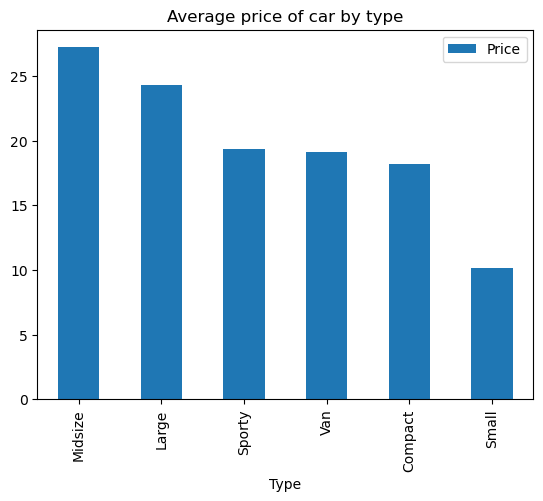

In [77]:
a.plot(kind="bar", title="Average price of car by type")

### Q.2 Show median weight by Cylinder and Origin

In [79]:
b = (
    df.groupby(by = ["Cylinders", "Origin"])
    .agg({"Weight" : "median"})
    .sort_values(by = "Weight")
    .round(2)
)
b

Weight
Cylinders Origin         
3         non-USA  1965.0
4         USA      2680.0
          non-USA  2775.0
rotary    non-USA  2895.0
6         non-USA  3515.0
          USA      3542.5
5         non-USA  3602.5
8         USA      3922.5
          non-USA  4000.0

<Axes: title={'center': 'Median Weight by Cylinders and Origin'}, ylabel='Cylinders,Origin'>

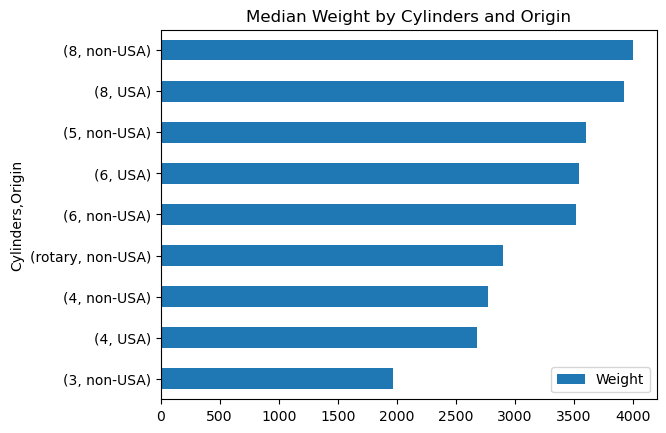

In [80]:
b.plot(kind= "barh", title = "Median Weight by Cylinders and Origin")